In [24]:
import pandas as pd

feature_df = pd.read_csv(r"gisette\gisette_train.data", header=None)
feature_df.describe()

,0
count,6000
unique,6000
top,749 0 728 0 0 0 0 0 0 0 0 0 0 991 991 0 0 0 0 ...
freq,1


In [25]:
label_df = pd.read_csv(r"gisette\gisette_train.labels", header=None)
label_df

,0
0,1
1,-1
2,1
3,1
4,1
...,...
5995,-1
5996,1
5997,-1
5998,-1


In [3]:
label_columns = ['diagnosis']
label_df.columns = label_columns

feature_columns = ['pattern']
feature_df.columns = feature_columns


label_df['diagnosis'].replace(1, 'Cancer', inplace=True)
label_df['diagnosis'].replace(-1, 'Normal', inplace=True)

feature_df



,pattern
0,550 0 495 0 0 0 0 976 0 0 0 0 983 0 995 0 983 ...
1,0 0 0 0 0 0 0 976 0 0 0 0 0 0 584 0 0 0 0 0 0 ...
2,0 0 0 0 0 0 0 0 0 0 0 0 983 0 995 983 976 0 0 ...
3,0 0 742 0 0 0 0 684 0 956 0 0 983 0 991 816 98...
4,0 0 0 0 0 0 0 608 0 979 0 0 0 0 972 0 0 0 0 0 ...
...,...
5995,0 0 0 0 0 0 0 0 0 0 0 0 0 0 956 0 0 0 0 0 0 0 ...
5996,0 0 0 0 0 0 0 0 0 0 0 0 0 0 991 630 0 0 0 719 ...
5997,0 0 0 0 0 758 0 0 0 522 0 0 991 596 0 960 968 ...
5998,0 0 0 0 0 0 0 0 0 0 0 0 0 0 729 501 504 0 0 0 ...


In [4]:
label_df

,diagnosis
0,Cancer
1,Normal
2,Cancer
3,Cancer
4,Cancer
...,...
5995,Normal
5996,Cancer
5997,Normal
5998,Normal


In [5]:
feature_df.count()

pattern    6000
dtype: int64

In [8]:
first_row = feature_df.iloc[0,0]
ex = first_row.split(" ")
len(ex)

5001

In [9]:
last_row = feature_df.iloc[5999,0]
ey = last_row.split(" ")
len(ey)

5001

In [10]:
feature_df['pattern'] = feature_df['pattern'].map(lambda x: x.strip())

In [11]:
feature_df= feature_df.pattern.str.split(expand=True)
feature_df

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,550,0,495,0,0,0,0,976,0,0,...,0,0,0,991,991,0,0,0,0,983
1,0,0,0,0,0,0,0,976,0,0,...,0,475,0,991,0,0,991,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,0,674,0,0,838
4,0,0,0,0,0,0,0,608,0,979,...,991,0,0,828,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,0,...,991,0,0,0,0,0,783,0,0,0
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,921,0,886,0
5997,0,0,0,0,0,758,0,0,0,522,...,0,901,0,0,0,0,980,0,0,0
5998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,690,0,0,0,0,0


In [12]:
from sklearn.preprocessing import StandardScaler
x = feature_df.values
x = x.astype(float)
x = StandardScaler().fit_transform(x)

In [13]:
import numpy as np
np.mean(x), np.std(x)

(-2.17544500931884e-19, 0.9954898291795854)

In [14]:
x

array([[ 1.54121954, -0.12304076,  0.94149741, ..., -0.13759497,
        -0.41609101,  2.53952425],
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       ...,
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       [-0.38979376, -0.12304076,  2.3929315 , ..., -0.13759497,
        -0.41609101,  2.56402036]])

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principal_components, columns=['PC1','PC2'])

In [16]:
principal_df

,PC1,PC2
0,27.930762,6.383795
1,18.516432,-9.879985
2,10.245827,-13.195511
3,11.003075,-3.281910
4,-13.678305,-3.769116
...,...,...
5995,-5.267345,7.005728
5996,-10.807279,1.528724
5997,4.001779,-12.656182
5998,-4.213559,-13.101288


In [17]:
pca.explained_variance_ratio_

array([0.02883488, 0.02258951])

In [18]:
label_df = label_df.iloc[:,0]
label_df

0       Cancer
1       Normal
2       Cancer
3       Cancer
4       Cancer
         ...  
5995    Normal
5996    Cancer
5997    Normal
5998    Normal
5999    Normal
Name: diagnosis, Length: 6000, dtype: object

<Figure size 432x288 with 0 Axes>

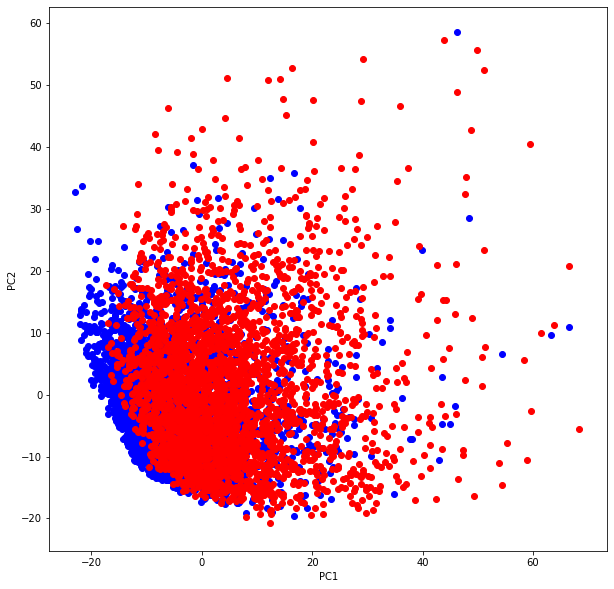

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('PC1')
plt.ylabel('PC2')
targets = ['Cancer', 'Normal']
colors = ['b','r']
for target, color in zip(targets, colors):
    indicesToKeep = label_df == target
    #print(indicesToKeep)
    plt.scatter(principal_df.loc[indicesToKeep, 'PC1'],
               principal_df.loc[indicesToKeep, 'PC2'],
               c = color)

In [20]:
# How many principal components do we need to explain the variance in data?
pca = PCA().fit(x)

evr = pca.explained_variance_ratio_
print('\n'.join('{:2d}: {:0.4f}'.format(*k) for k in enumerate(evr)))
# FYI: We have to go to 6 significant digits to explain the last PC.

 0: 0.0288
 1: 0.0226
 2: 0.0166
 3: 0.0162
 4: 0.0124
 5: 0.0114
 6: 0.0102
 7: 0.0088
 8: 0.0072
 9: 0.0069
10: 0.0065
11: 0.0056
12: 0.0052
13: 0.0049
14: 0.0047
15: 0.0044
16: 0.0040
17: 0.0039
18: 0.0037
19: 0.0036
20: 0.0035
21: 0.0033
22: 0.0033
23: 0.0032
24: 0.0029
25: 0.0029
26: 0.0028
27: 0.0027
28: 0.0027
29: 0.0026
30: 0.0025
31: 0.0024
32: 0.0024
33: 0.0023
34: 0.0022
35: 0.0022
36: 0.0021
37: 0.0021
38: 0.0021
39: 0.0020
40: 0.0020
41: 0.0019
42: 0.0019
43: 0.0019
44: 0.0019
45: 0.0018
46: 0.0018
47: 0.0017
48: 0.0017
49: 0.0017
50: 0.0016
51: 0.0016
52: 0.0016
53: 0.0016
54: 0.0016
55: 0.0015
56: 0.0015
57: 0.0015
58: 0.0014
59: 0.0014
60: 0.0014
61: 0.0014
62: 0.0014
63: 0.0014
64: 0.0013
65: 0.0013
66: 0.0013
67: 0.0013
68: 0.0013
69: 0.0013
70: 0.0013
71: 0.0013
72: 0.0012
73: 0.0012
74: 0.0012
75: 0.0012
76: 0.0012
77: 0.0012
78: 0.0011
79: 0.0011
80: 0.0011
81: 0.0011
82: 0.0011
83: 0.0011
84: 0.0011
85: 0.0011
86: 0.0011
87: 0.0010
88: 0.0010
89: 0.0010
90: 0.0010

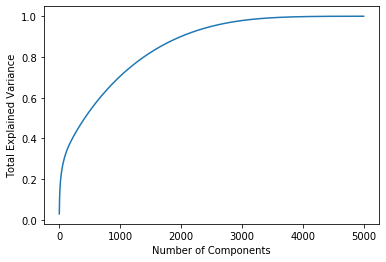

In [21]:
# Graph
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance');